In [ ]:
#install.packages("caret", dependencies = c("Depends", "Suggests"))
# install.packages("mlbench")

In [50]:
#https://topepo.github.io/caret/model-training-and-tuning.html#basic
library(caret)
library(doParallel)
library(doMC) 
registerDoMC(cores = 4) 

In [52]:
library(mlbench)
data(Sonar)
head(Sonar)
dim(Sonar)
table(Sonar$Class)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


[1] 208  61


  M   R 
111  97 

# 1 split your data into traning /testing 

In [22]:
set.seed(998)
inTraining <- createDataPartition(Sonar$Class, p = .75, list = FALSE)
training <- Sonar[ inTraining,]
testing  <- Sonar[-inTraining,]

# 2 configure your training (CV, ROC)

In [66]:
fitControl <- trainControl(## 10-fold CV
                           method = "cv",
                           number = 10,
                          classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = twoClassSummary,
                           savePredictions = T)

# 3 traing your model using training split

In [67]:
set.seed(825)
gbmFit1 <- train(Class ~ ., data = training, 
                 method = "gbm", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = TRUE,
                ## Specify which metric to optimize
                 metric = "ROC")
gbmFit1

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3141            -nan     0.1000    0.0270
     2        1.2492            -nan     0.1000    0.0207
     3        1.1943            -nan     0.1000    0.0206
     4        1.1486            -nan     0.1000    0.0084
     5        1.1076            -nan     0.1000    0.0120
     6        1.0625            -nan     0.1000    0.0143
     7        1.0306            -nan     0.1000    0.0093
     8        1.0068            -nan     0.1000   -0.0003
     9        0.9627            -nan     0.1000    0.0165
    10        0.9317            -nan     0.1000    0.0066
    20        0.7272            -nan     0.1000   -0.0038
    40        0.4615            -nan     0.1000    0.0001
    60        0.3223            -nan     0.1000   -0.0032
    80        0.2334            -nan     0.1000   -0.0007
   100        0.1702            -nan     0.1000   -0.0006
   120        0.1269            -nan     0.1000   -0.0005
   140        

Stochastic Gradient Boosting 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 141, 141, 142, 141, 141, 142, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  ROC        Sens       Spec     
  1                   50      0.8684524  0.8111111  0.6964286
  1                  100      0.8806300  0.7986111  0.7089286
  1                  150      0.8918403  0.8472222  0.7642857
  2                   50      0.9007192  0.8486111  0.7375000
  2                  100      0.9069444  0.8694444  0.7928571
  2                  150      0.9179812  0.8930556  0.8071429
  3                   50      0.8805804  0.8569444  0.7821429
  3                  100      0.8904266  0.8708333  0.7803571
  3                  150      0.9017361  0.8819444  0.7928571

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10


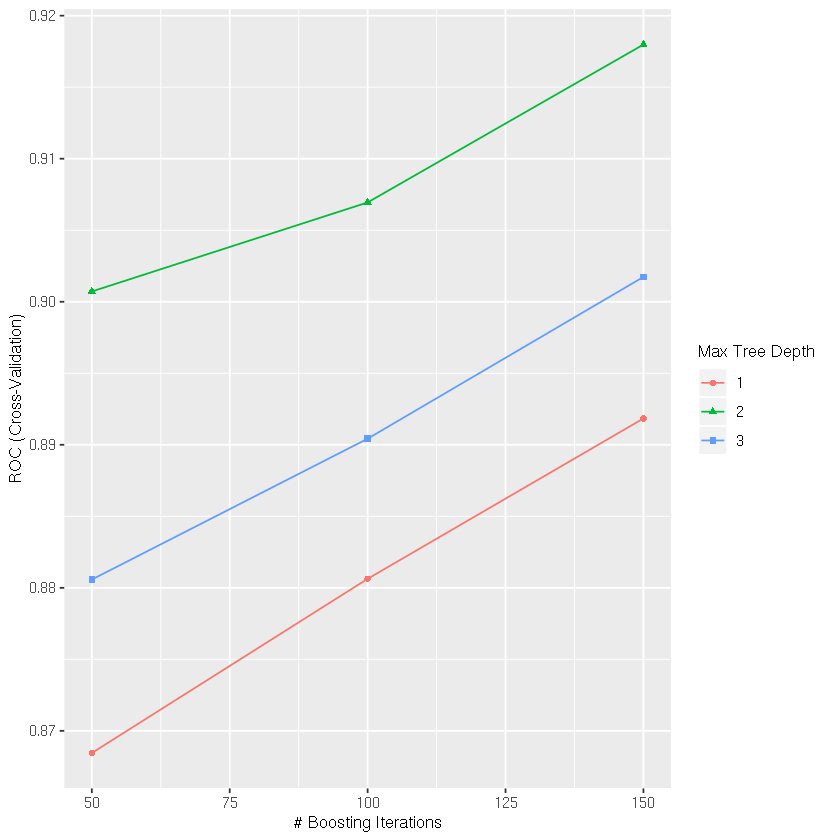

In [56]:
ggplot(gbmFit1)  


# 4 test your model using testing split

In [57]:
predict(gbmFit1, newdata = head(testing))


[1] R R R R M M
Levels: M R

In [58]:
predict(gbmFit1, newdata = head(testing), type = "prob")


M,R
0.135555488,0.8644445
0.031129963,0.9688700
0.002474945,0.9975251
0.102249673,0.8977503
0.970998702,0.0290013
0.877082300,0.1229177


[1] 2

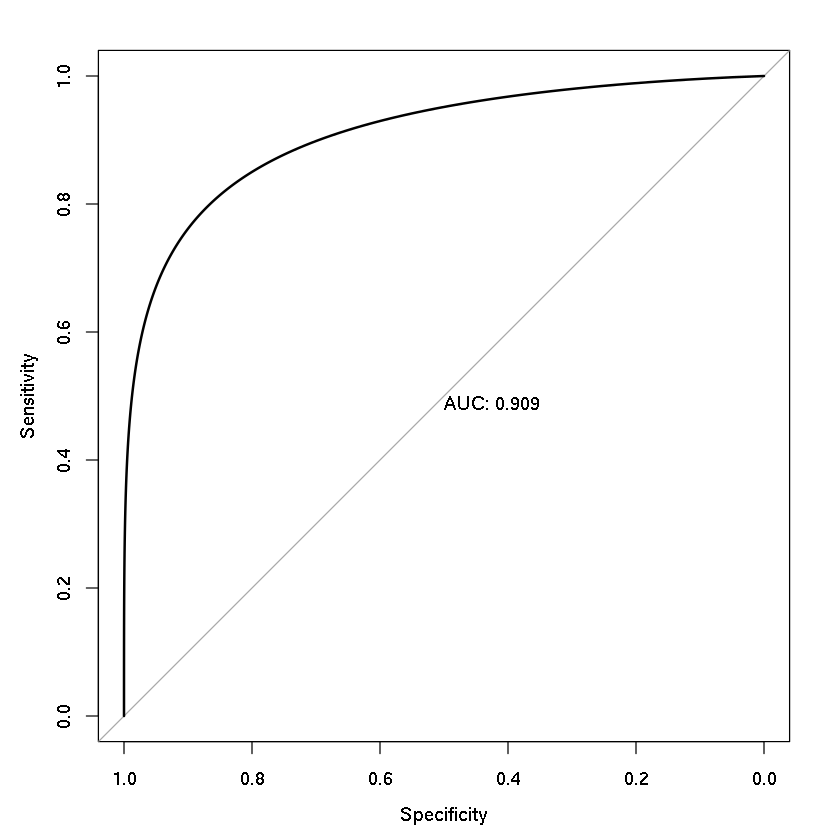

In [84]:
# ROC for training
#https://stackoverflow.com/questions/31138751/roc-curve-from-training-data-in-caret
gbmFit1$finalModel$tuneValue$interaction.depth
selectedIndices = gbmFit1$pred$interaction.depth==gbmFit1$finalModel$tuneValue$interaction.depth
plot.roc(gbmFit1$pred$obs[selectedIndices],
         gbmFit1$pred$M[selectedIndices],print.auc = TRUE,smooth=T)

In [ ]:
#roc(response, predictor)

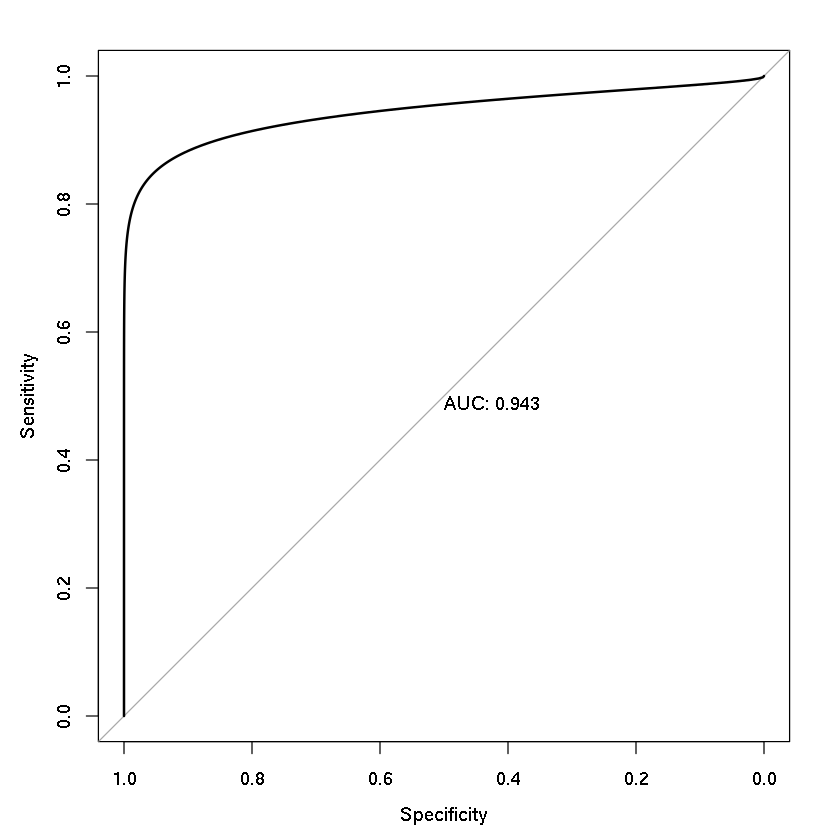

In [86]:
library(pROC)
predcitd= predict(gbmFit1, newdata = (testing), type = "prob")
plot.roc(testing$Class,predcitd$M,smooth=T,print.auc = TRUE)

# parameters auto-tunning

In [ ]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = twoClassSummary)

In [ ]:
gbmGrid2 <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = (1:30)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)

In [ ]:
set.seed(825)
gbmFit2 <- train(Class ~ ., data = training, 
                 method = "gbm", 
                 trControl = fitControl, 
                 verbose = FALSE, 
                 tuneGrid = gbmGrid,
                 ## Specify which metric to optimize
                 metric = "ROC")
gbmFit3

# Parallel computing 

In [ ]:
#https://topepo.github.io/caret/model-training-and-tuning.html#basic
library(caret)
library(doParallel)
library(doMC) 
registerDoMC(cores = 4) 

In [ ]:
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

In [ ]:
set.seed(825)
svmFit1 <- train(Class ~ ., data = training, 
                 method = "svmLinear", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = FALSE,allowParallel= T)
svmFit1